# Dataset

Before we try to demonstrate positional bias, we need a good source of MCQs. We'll use the Measuring Massive Multitask Language Understanding (MMLU) (Hendrycks et al. 2021) dataset of multiple choice questions downloaded from the MMLU repository https://github.com/hendrycks/test. MMLU contains 14,042 MCQs from 57 categories.

Here, we load the Measuring Massive Multitask Language Understanding (MMLU) (Hendrycks et al. 2021) dataset of multiple choice questions downloaded from the MMLU repository https://github.com/hendrycks/test. Each question has 4 options A, B, C, and D and one correct answer. In addition, each category has 5 example questions designed for consistent, 5-shot experiments.

# Setup

In [1]:
import logging
from pathlib import Path

from matplotlib import pyplot as plt

import llm_mcq_bias as lmb

In [2]:
project_path = Path("../")
datasets_path = project_path / ".build" / "datasets"

logger = logging.getLogger(__name__)

# Load Data

We'll start by loading the unmodified MMLU dataset.

In [3]:
# Load example questions
examples = lmb.datasets.mmlu.load_dataset(datasets_path, segment="dev")

# Load test questions
questions = lmb.datasets.mmlu.load_dataset(datasets_path, segment="test")

In [4]:
questions.sample(n=5)

,question,A,B,C,D,answer,category
6427,A condominium development consists of two buil...,"No, because families with children are allowed...","No, because the amendment is based on legitima...","Yes, because families with children are alread...","Yes, because families with children cannot be ...",D,professional law
6354,"An owner sold his home to a purchaser, who mov...",The first purchaser wins because the second pu...,The second purchaser will prevail because he r...,The first purchaser will prevail because she p...,The second purchaser wins because the first pu...,A,professional law
5002,What does Pence think is an appropriate stand...,There should be no standards for safety.,SCNT should not be allowed unless a healthy ba...,SCNT should be allowed when it falls within th...,none of the above,C,moral disputes
8139,Among the executive branch's checks on the leg...,call special sessions of Congress,introduce bills to the floor of Congress,address Congress during its debate on bills,vote on acts of Congress,A,high school government and politics
922,What was the key difference between US expansi...,US expansion was based on territory rather tha...,US expansion was based on markets rather than ...,US expansion was limited to Latin America post...,US expansion ended after 1865,B,us foreign policy


# Answer Distribution

Our goal is to quantify a model's inherrent positional bias by measuring the difference in accuracy caused by shifting all the correct answers to a specific option. However, if the initial pool of questions is already biased, it becomes difficult to confidently estimate the model's underlying bias.

Let's take a look at the distribution of correct answers in MMLU dataset.

Text(0.5, 1.0, 'Examples')

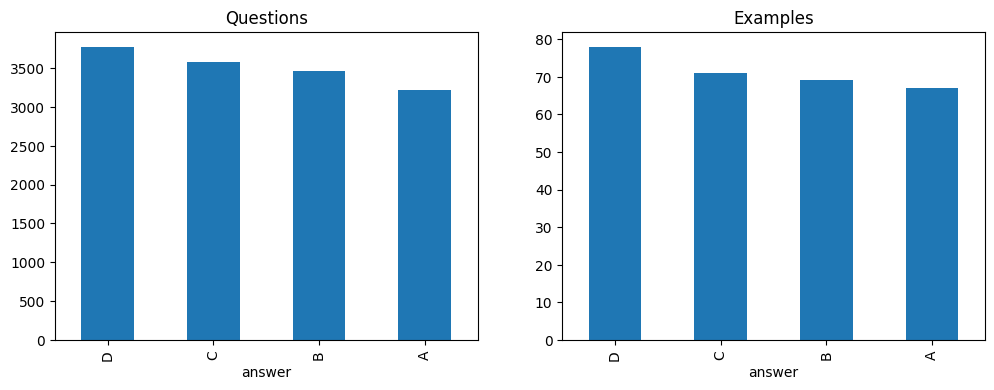

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

questions.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Questions")

examples.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Examples")

We can see a slight bias in both the test and example questions.

# Normalize Answer Distribution

To better support our positional bias experiment, we normalize the answer distribution so each option is uniformly distributed.

## Questions

In [6]:
normalized_questions = lmb.datasets.mmlu.normalize_question_answers(questions)

In [7]:
normalized_questions.head()

,question,A,B,C,D,answer,category
0,Light from a laser falls on a pair of very nar...,0.5 mm,0.25 mm,1.0 mm,2.0 mm,A,college physics
1,The 30 upright stones at Stonehenge are called...,"legumes, sarsens","sarsens, lintels","lintels, stelae","trilithon, tholoi",B,prehistory
2,Three 25.00 mL samples of approximately 0.10 M...,There was an acid contaminating the unclean be...,The wrong indicator was used.,There was a base contaminating the unclean bea...,The indicator was added too late.,A,high school chemistry
3,What is the term Tuckman uses for reaching con...,Storming,Performing,Forming,Norming,D,management
4,"On Metz's view, what kind of punishment is ju...",Harmful punishment that is proportionate to th...,All of the above.,Degradation proportionate to the degrading imp...,Unfriendly action that is proportionate to the...,D,moral disputes


Text(0.5, 1.0, 'Normalized Questions')

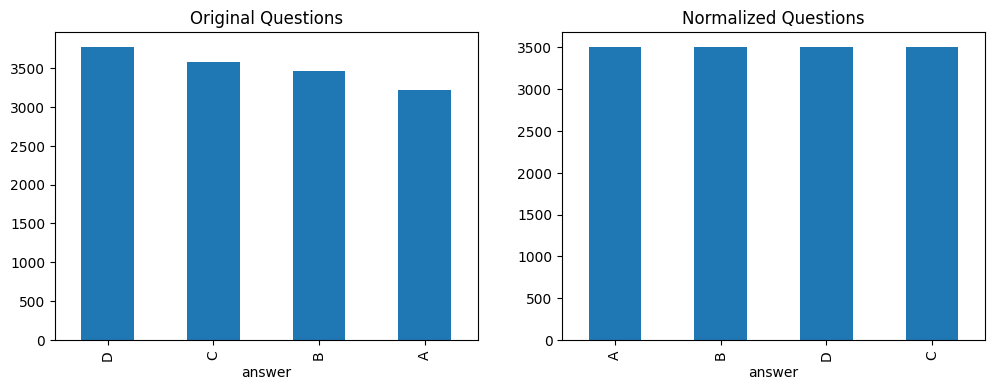

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

questions.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Original Questions")

normalized_questions.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Normalized Questions")

## Examples

Each category has 5 example questions used to generate few-shot prompts. Since we only have 4 options, we can't evenly distribute the 5 answers for each category. Since we're not trying to maximize model accuracy, we simply throw away one of the example questions and evenly distribute the remaining 4.

In [9]:
normalized_examples = lmb.datasets.mmlu.normalize_example_answers(examples)

Text(0.5, 1.0, 'Normalized Examples')

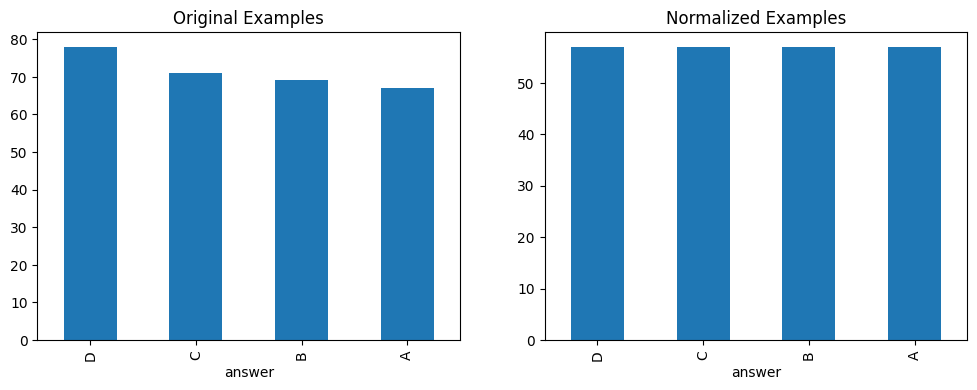

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

examples.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Original Examples")

normalized_examples.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Normalized Examples")